In [ ]:
# Download data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

/user/lehoang2/cvl/project/CarPricePrediction/car_price/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 292k/292k [00:00<00:00, 8.75MB/s]

Extracting files...
Path to dataset files: /user/lehoang2/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4


In [30]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# first 5 rows of dataset
car_data = pd.read_csv("../car_details_v4.csv")

car_data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


EDA

In [20]:
# divide to train test
from sklearn.model_selection import train_test_split
X = car_data.drop(columns=['Price'])
y = car_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# describe data
X_train.describe()

,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1647.000000,1.647000e+03,1595.00000,1595.000000,1595.000000,1595.000000,1557.000000
mean,2016.419551,5.420636e+04,4281.47837,1767.580564,1592.423824,5.310345,52.154656
std,3.370327,5.849584e+04,448.16458,137.053924,136.360967,0.816002,15.405199
min,1988.000000,0.000000e+00,3099.00000,1475.000000,1165.000000,2.000000,15.000000
25%,2014.000000,2.900000e+04,3985.00000,1695.000000,1485.000000,5.000000,40.000000
50%,2017.000000,5.000000e+04,4370.00000,1775.000000,1550.000000,5.000000,50.000000
75%,2019.000000,7.200000e+04,4630.00000,1835.000000,1675.000000,5.000000,60.000000
max,2022.000000,2.000000e+06,5569.00000,2220.000000,1995.000000,8.000000,105.000000


--> Missing values in length, width, height etc
--> Max 2000000 km is quite suspicious --> plot histogram and consider clipping extreme outliers

<Axes: >

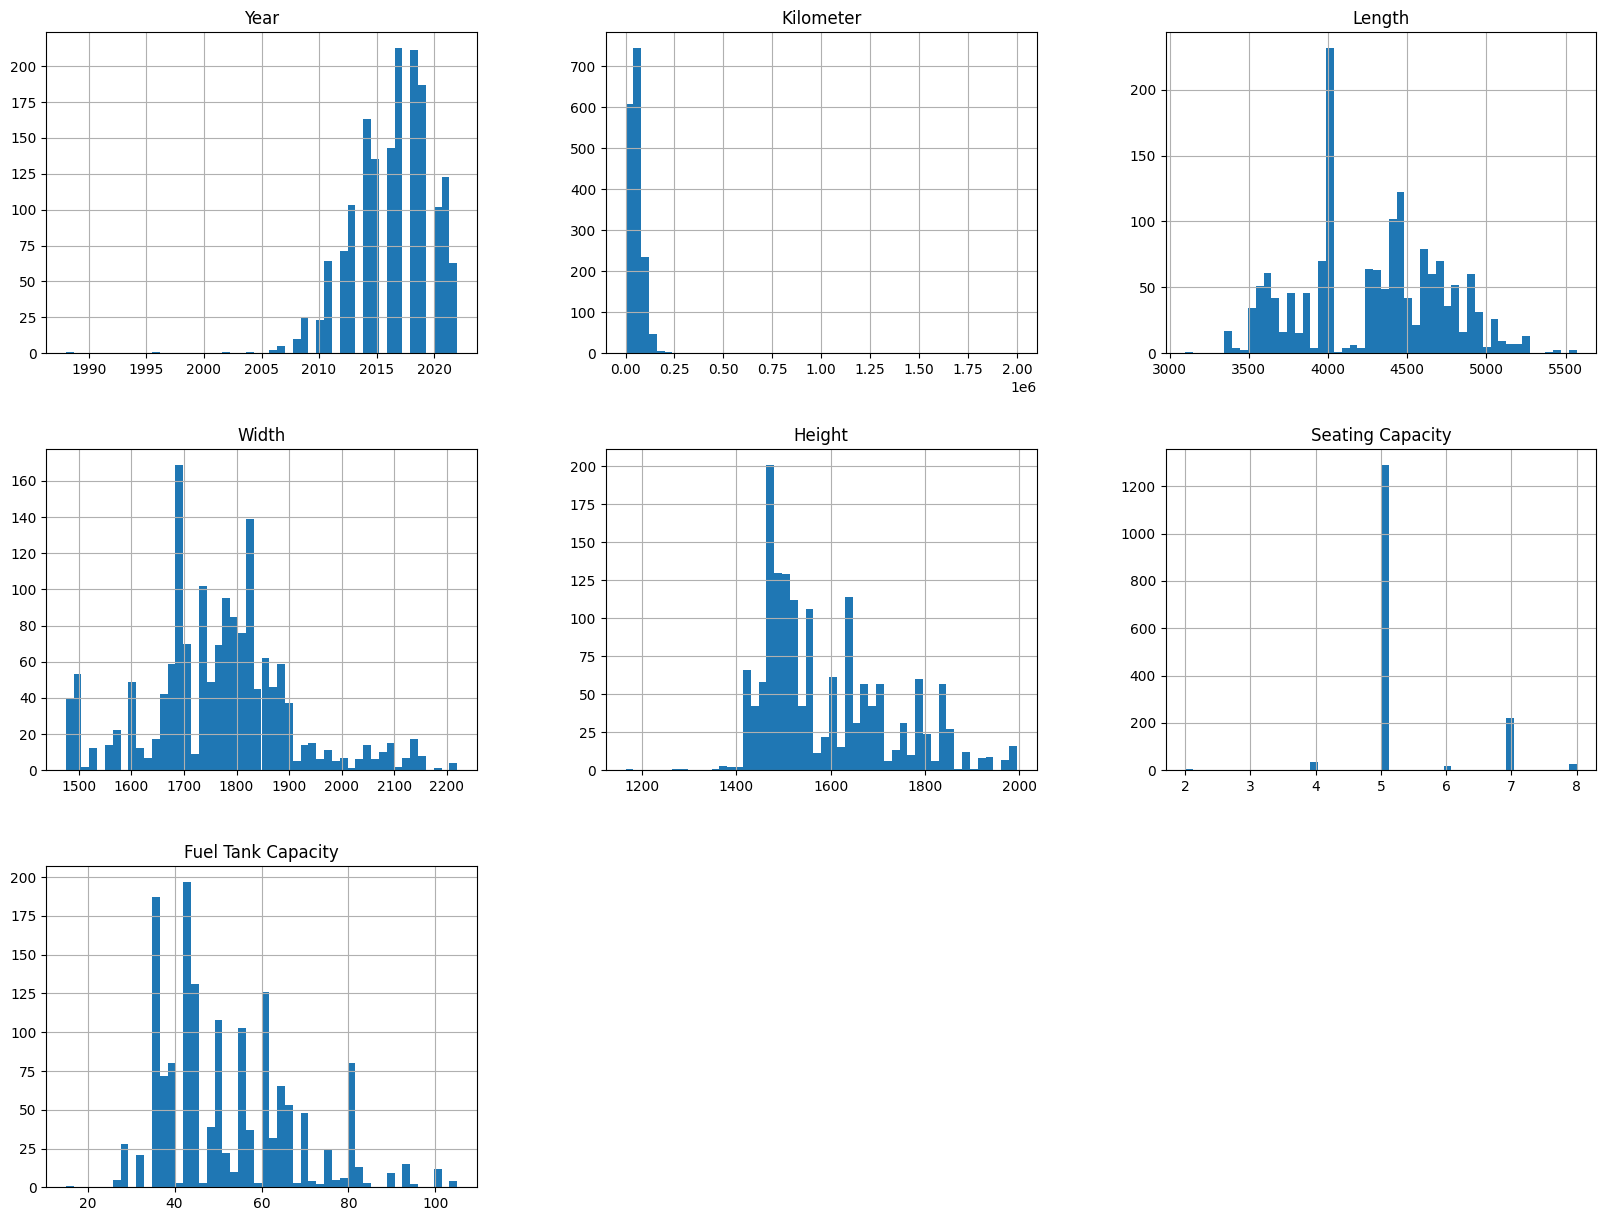

In [ ]:
# plot histogram 
X_train.hist(bins=50, figsize=(20,15))


Text(0, 0.5, 'Frequency')

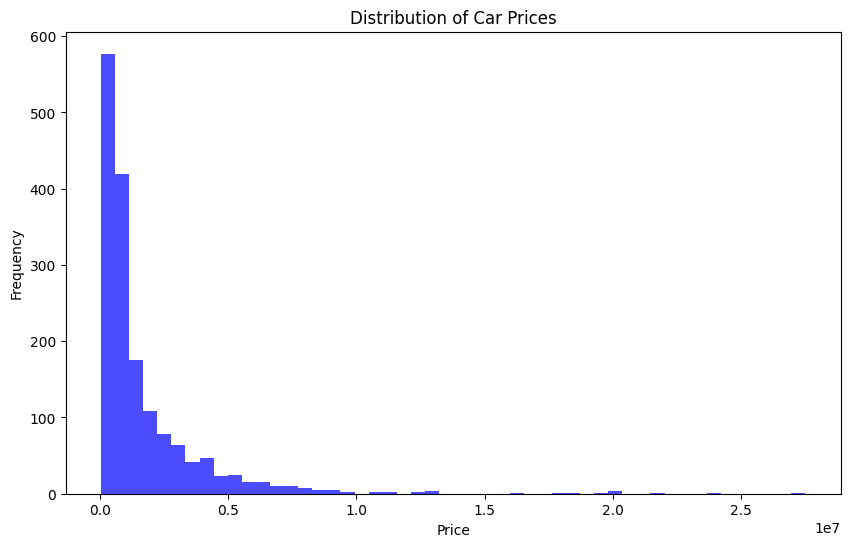

In [26]:
# y distribution
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

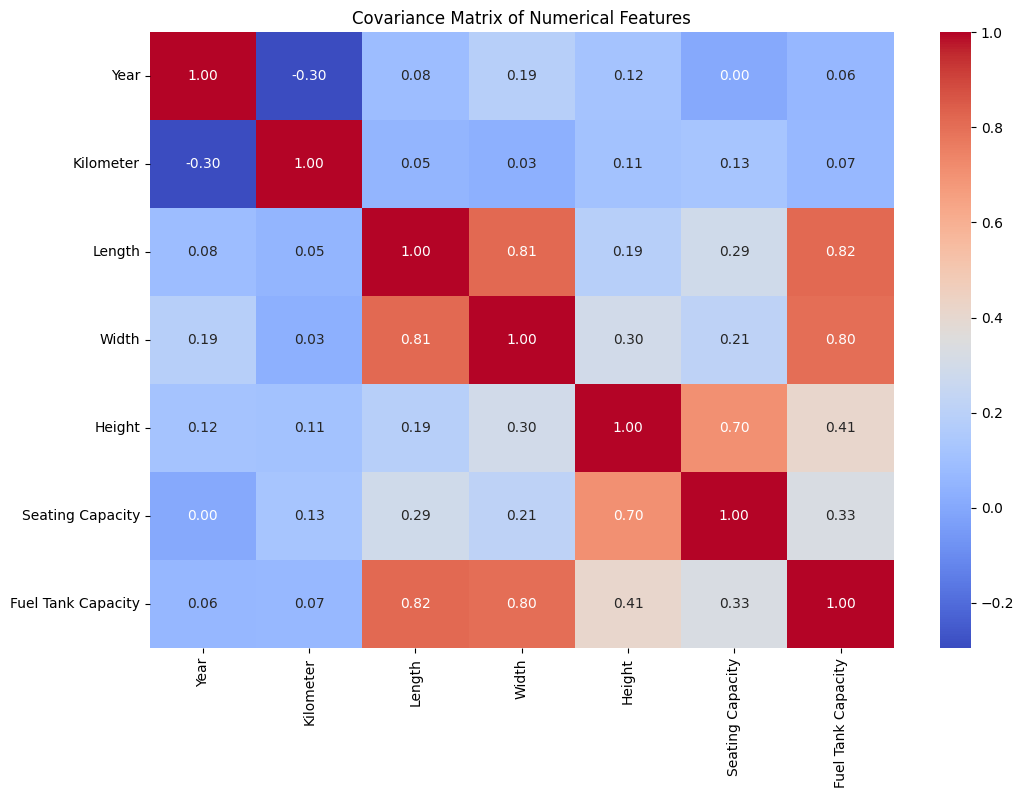

In [33]:
# covariance matrix on numerical features only
numerical_features = X_train.select_dtypes(include=[np.number])
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Covariance Matrix of Numerical Features')
plt.show()

/tmp/ipykernel_729058/1586429494.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data[col].fillna(median_value, inplace=True)
/tmp/ipykernel_729058/1586429494.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 